In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score

In [3]:
data = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv')
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
#Checking number of dataset
data.shape

(2226382, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


**Data Cleaning**

In [6]:
#brokered_by, zip_code, street should be string type
data['brokered_by'] = data['brokered_by'].astype(str)
data['zip_code'] = data['zip_code'].astype(str)
data['street'] = data['street'].astype(str)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     object 
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          object 
 7   city            object 
 8   state           object 
 9   zip_code        object 
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(5), object(7)
memory usage: 203.8+ MB


In [8]:
#Checking Missing Values
data.isna().sum()

brokered_by            0
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street                 0
city                1407
state                  8
zip_code               0
house_size        568484
prev_sold_date    734297
dtype: int64

In [9]:
#Removing missing value
data.dropna(inplace=True)

In [10]:
#Checking Duplicates
data.duplicated().sum()

0

In [11]:
#Checking number of dataset after cleaning
data.shape

(1089759, 12)

**Correlation between Price vs State**

In [12]:
#Checking dependency of price vs state

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(state)', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq         df            F  PR(>F)
C(state)  7.433644e+16       52.0  1058.022826     0.0
Residual  1.472356e+18  1089706.0          NaN     NaN


p-value < 0.05 
There is a significant difference between the mean house prices across different states.

In [13]:
#Checking number of data by state
data['state'].value_counts()

state
California              158487
Florida                 109273
Texas                   106174
Arizona                  50292
Pennsylvania             42728
Georgia                  42450
Washington               41256
New York                 39053
Illinois                 38740
Virginia                 38423
Ohio                     35620
Maryland                 30577
Minnesota                27665
North Carolina           27638
Massachusetts            24893
Oklahoma                 22979
Missouri                 20713
Oregon                   18463
New Jersey               16219
Colorado                 15222
Michigan                 14818
Wisconsin                13030
Iowa                     12751
Tennessee                12391
South Carolina           11287
Kentucky                 10949
Alabama                   9519
Idaho                     9187
New Mexico                8877
Arkansas                  8641
Louisiana                 8279
Nevada                    7094
Ka

**California Real Estate Analysis**

In [14]:
#Change to California Real Estate Analysis
#To filter out data that is not related to the state of California
df_ca = data[data['state'] == 'California']
df_ca

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.0,for_sale,172999.0,3.0,2.0,0.16,987585.0,Blythe,California,92225.0,1132.0,1984-06-29
1209113,4311.0,for_sale,201000.0,2.0,2.0,0.34,761139.0,Blythe,California,92225.0,1100.0,1997-09-23
1209116,76008.0,for_sale,250000.0,7.0,3.0,0.19,1002149.0,Blythe,California,92225.0,3126.0,2015-09-23
1209118,86230.0,for_sale,325000.0,3.0,2.0,5.00,664584.0,Blythe,California,92225.0,1925.0,1985-01-14
1209120,22611.0,for_sale,287500.0,5.0,3.0,0.20,1230938.0,Blythe,California,92225.0,1642.0,2018-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2177842,79212.0,sold,525000.0,1.0,1.0,0.02,1063265.0,South Lake Tahoe,California,96150.0,607.0,2022-03-07
2177843,27315.0,sold,459400.0,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177849,84002.0,sold,850000.0,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,31770.0,sold,959000.0,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


In [15]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158487 entries, 1208998 to 2177858
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     158487 non-null  object 
 1   status          158487 non-null  object 
 2   price           158487 non-null  float64
 3   bed             158487 non-null  float64
 4   bath            158487 non-null  float64
 5   acre_lot        158487 non-null  float64
 6   street          158487 non-null  object 
 7   city            158487 non-null  object 
 8   state           158487 non-null  object 
 9   zip_code        158487 non-null  object 
 10  house_size      158487 non-null  float64
 11  prev_sold_date  158487 non-null  object 
dtypes: float64(5), object(7)
memory usage: 15.7+ MB


In [16]:
#Find Correlation by price
numerical_df = df_ca[['price', 'bed', 'bath', 'acre_lot', 'house_size']]
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

               price       bed      bath  acre_lot  house_size
price       1.000000  0.222195  0.375561 -0.001848    0.495089
bed         0.222195  1.000000  0.765625 -0.006286    0.675802
bath        0.375561  0.765625  1.000000 -0.002147    0.808366
acre_lot   -0.001848 -0.006286 -0.002147  1.000000   -0.002934
house_size  0.495089  0.675802  0.808366 -0.002934    1.000000


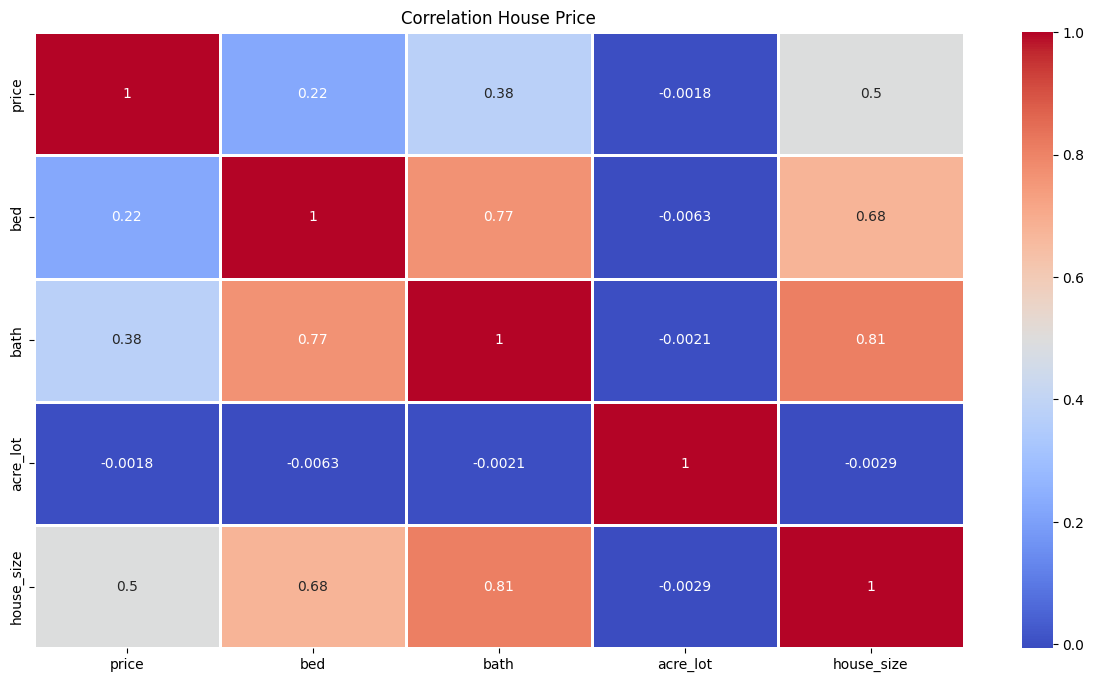

In [17]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=1)
plt.title('Correlation House Price')
plt.show()

**Linear Regression Model**

In [18]:
df_copy = df_ca.copy()

columns_to_remove = ['status', 'brokered_by', 'city', 'state', 'prev_sold_date', 'street', 'zip_code']
df_copy.drop(columns=columns_to_remove, inplace=True)

In [19]:
df_copy

,price,bed,bath,acre_lot,house_size
1208998,172999.0,3.0,2.0,0.16,1132.0
1209113,201000.0,2.0,2.0,0.34,1100.0
1209116,250000.0,7.0,3.0,0.19,3126.0
1209118,325000.0,3.0,2.0,5.00,1925.0
1209120,287500.0,5.0,3.0,0.20,1642.0
...,...,...,...,...,...
2177842,525000.0,1.0,1.0,0.02,607.0
2177843,459400.0,3.0,1.0,0.12,1160.0
2177849,850000.0,4.0,3.0,0.14,1956.0
2177857,959000.0,4.0,3.0,0.21,1824.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

train_data = df_copy
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
print('R2 score',regr.score(X_test,y_test))

R2 score 0.34250942552511376


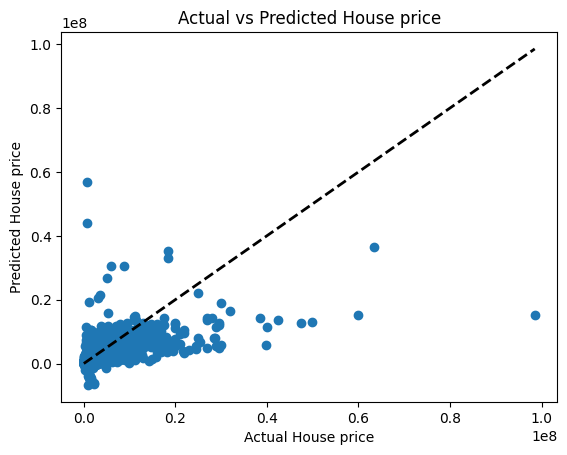

In [22]:
y_predicted = regr.predict(X_test)
plt.scatter(x=y_test,y=y_predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted House price')
plt.xlabel('Actual House price')
plt.ylabel('Predicted House price')
plt.show()